- Study the correlation between features and find the features subset with the highest correlation with the target column, and try to explain from the business point of view why they have such a big correlation.
- Please comment on your code.

In [76]:
# import library
import numpy as np
import pandas as pd
# from sklearn import sklearn
import sklearn as sk

# library for corelation show
import seaborn as sns
# library for training
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.linear_model import LinearRegression


In [16]:
# import our data set
df = pd.read_csv('HousingData.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


- Create a second set of data with the columns that have an absolute correlation between 0.5 and 0.8 with the target column.

In [148]:
# Find what columns have the highest absolute correlation with the target column 
# (target column is specified in the data set page), and try to explain why do you think so happens. 
# (here you can explore literature on topic.)

# correlation describes the relationship between variables
# Pearson Correlation by default
df_coreleation = df.corr() # de făcut de la 0.5 - 0.8

df_coreleation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


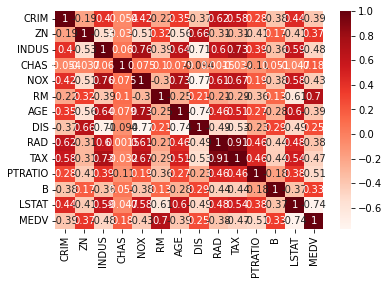

In [49]:
cor = df.corr()
cor_target = abs(cor["MEDV"])

sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [154]:
relevant_features_min = cor_target[cor_target > 0.5]  
# relevant_features_max = cor_target[cor_target < 0.8]

# relevant_features = df[(df['MEDV'] < 0.8) & (df['MEDV'] > 0.5)]
# relevant_features
print(relevant_features_min)


RM         0.695360
PTRATIO    0.507787
LSTAT      0.735822
MEDV       1.000000
Name: MEDV, dtype: float64


In [151]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.375966
PTRATIO  0.375966  1.000000
             RM     LSTAT
RM     1.000000 -0.614339
LSTAT -0.614339  1.000000


- Split the data into 2 sub-sets using the train_test_split function from sklearn.

In [141]:
X = df['MEDV'].values.reshape(-1, 1)
y = df['RM'].values.reshape(-1, 1)
# care sutn acele 2 seturi?

- Train a sklearn Linear Regression model on the data provided to you.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create an instance of the LinearRegression class from sklearn. 
lr = LinearRegression() 
    
# Call the fit function, which applies the Linear Regression model # onto the data. 
lr.fit(X_train, y_train) 
    
# Define a variable that stores the predictions of our model. 
y_pred = lr.predict(X_test) 
    
# Print the mean squared error and mean absolute error to get an idea of 
# how well the model has done. 
mean_squared_error(y_pred, y_test), mean_absolute_error( y_pred, y_test) 

# e corect aici?

(0.3021488829482636, 0.3847726109164858)

- Train a from-scratch implementation of Linear Regression on the train sub-set.

In [111]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

# care sunt sub seturile pe care trebuie sa fac chestia data

[5.08425014]
[[0.05402755]]


- Test the models on the test sets from the initial set of data, for error metrics use the models score function for the sklearn model.

In [144]:
# min value error - error - absolte, discret  - categ
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
run_experiment(model)

# este corect?

R^2 :  0.47518623904685797
MAE : 0.3847726109164858
RMSE: 0.5496807100019643


- Split the data with the selected columns into 2 sub-sets using the train_test_split function from sklearn.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)
# care sunt acele sub seturi?

In [147]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_

array([5.08425014])

- Train a sklearn Linear Regression model on the data with selected columns (train subset).

In [ ]:
# aici trebuie de facut regresia lianara doar pe un seb set?

- Train a from-scratch implementation of Linear Regression on the train sub-set.

- Test the models on the test sets from the initial set of data, for error metrics use the models score function for the sklearn model.

- Please try to interpret the results that you are getting by comparing the error of the models that you created.

In [8]:
import numpy as np 
class LinearRegression(): 
    
    #Define a Linear Regression class to store our relevant functions in 
    def __init__(self): 
#       which Initializes the Linear Regression model. It also stores the self.params__ variable, 
#       will be the weights that the model returns. 
        
        self.params__ = None
        
        def gradientDescent(self, X, y, learning_rate=0.00001, iterations=500, batch_size=16): 
#           model This function applies the Gradient Descent to the dataset :param X: 
#           numpy.ndarray The X matrix containing the independent variable columns. 
#           :param y: numpy.ndarray The target vector y. ’’’ 
            
            # Add a column of ones for the constant term 
            X = np.concatenate([X, np.ones_like(y)], axis = 1) 
            rows, cols = X.shape 
            
            # Combine the X and y columns to more easily shuffle it later 
            X = np.append(X, y, axis=1) 
           
            # Make the initial random guess for w 
            w = np.random.random((cols, 1)) 
            
            #Go through all the iterations 
            for i in range(iterations): 
            
                #Shuffle the rows of the data 
                np.random.shuffle(X) 
            
                #Define X and y again 
                y_it = X[:,-1].reshape((rows, 1)) 
                X_it = X[:, :-1] 
                
                #Iterate through the batches 
                for batch in range(math.ceil(rows / batch_size)): 
                    batch_start = batch * batch_size 
                
                    #Cut a batch from the dataset 
                    x_batch = X_it[batch_start: min( batch_start + batch_size, X.shape[0] )] 
                    y_batch = y_it[batch_start: min( batch_start + batch_size, X.shape[0] )] 
                    
                    #Subtract the gradient from our previous estimation 
                    w -= learning_rate * np.matmul(x_batch. transpose(), (np.matmul(x_batch, w)- y_batch)) 
                self.params__= w 
                return self 
            
            def predict(self, X): 
                X = np.concatenate([X, np.ones(X.shape[0]).reshape ((X.shape[0], 1))], axis=1) 
                return np.matmul(X, self.params__) 
            

In [10]:
# However, we usually want to use the Sklearn library that has a more advanced implementation of this model: 
    # Importing all needed libraries. 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.linear_model import LinearRegression
    
# Define some mock-up data. 
# Create a 10x2 matrix with random integers in the range 0-100. 
X = np.linspace(0, 100, 100).reshape(100, 1) 
    
# Define a random noise vector to add onto the vector y. 
e = np.random.uniform(-5, 5, (100, 1)) 
    
#Define the vector y = 3*x + e. 
y = 3*X + e 
    
# Split the data into train and test. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
# Create an instance of the LinearRegression class from sklearn. 
lr = LinearRegression() 
    
# Call the fit function, which applies the Linear Regression model # onto the data. 
lr.fit(X_train, y_train) 
    
# Define a variable that stores the predictions of our model. 
y_pred = lr.predict(X_test) 
    
# Print the mean squared error and mean absolute error to get an idea of 
# how well the model has done. 
mean_squared_error(y_pred, y_test), mean_absolute_error( y_pred, y_test) 

(7.239521811174783, 2.2066183415246354)